# Webscraping and Exploratory Analysis

In this mini-project I am going to do some webscraping and exploratory analysis according to road safety data in Europe.

Data is extracted from Wikipedia tables, then processed into a Pandas dataframe and finally saved into a csv file.

In [1]:
# Libraries needed
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Default settings for plot sizes
plt.rcParams["figure.figsize"] = (20,20)


In [2]:
# The URL/web page we are going to be scraping
url = "https://en.wikipedia.org/wiki/Road_safety_in_Europe"

In [3]:
# Using urllib.request we can get the HTML as response
page = urllib.request.urlopen(url)

In [4]:
# Now we parse the response with BeautifulSoup
soup = BeautifulSoup(page, "html")

In [5]:
# First, we need to filter the page so we only need all tags <table>
all_tables=soup.find_all("table")

In [6]:
#After inspecting element, I've found the CSS classes that involves the required table:
table=soup.find_all('table', class_='wikitable sortable')

In [7]:
#I will fill arrays with all data from table. I will go through all the table
# and for each row (<td> in HTML table) I split each line and insert the element into
# correspondent array

country=[]
area=[]
population=[]
GDP=[]
population_density=[]
vehicle_ownership=[]
road_network_length=[]
total_road_deaths=[]
road_deaths_per_million=[]


for row in table[0].findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==11:
        country.append(cells[0].find(text=True))
        area.append(cells[1].find(text=True))
        population.append(cells[2].find(text=True))
        GDP.append(cells[3].find(text=True))
        population_density.append(cells[4].find(text=True))
        vehicle_ownership.append(cells[5].find(text=True))
        road_network_length.append(cells[6].find(text=True))
        total_road_deaths.append(cells[7].find(text=True))
        road_deaths_per_million.append(cells[8].find(text=True))


In [8]:
# The table data has got \n character, so I need to filter it out.
# I create a method so as to apply it for each column in dataframe
def remove_trail(array):
    return [x[:-1] for x in array]

Since there is data which does not belong to 2018, we are going to assume that effectively are

In [9]:
df=pd.DataFrame(country,columns=['Country'])
df['Year'] = '2018'
df['Area (thousands of km)']=remove_trail(area)
df['Population']=remove_trail(population)
df['GDP per capita']=remove_trail(GDP)
df['Population density (inhabitants per km2)']=remove_trail(population_density)
df['Vehicle ownership']= remove_trail(vehicle_ownership)
df['Total Road Deaths']= remove_trail(total_road_deaths)
df['Road deaths per Million Inhabitants'] = remove_trail(road_deaths_per_million)

In [10]:
# Let's order the dataframe by Road deaths per Million Inhabitants
df = df.sort_values(by=['Road deaths per Million Inhabitants'])

# Some preprocessing for commas and points. Integers won't have any symbol, and floats will be .
df = df.apply(lambda x: x.str.replace(',',''))
df['Population'] =  df['Population'].str.replace('.','')

<ipython-input-10-9730a51df897>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Population'] =  df['Population'].str.replace('.','')


In [11]:
# All the data are strings, so I need to do one preprocessing step more.
# Every column except Area and Country are integers. Area is float

df[['Year','Population','GDP per capita','Population density (inhabitants per km2)','Vehicle ownership','Total Road Deaths','Road deaths per Million Inhabitants']] = df[['Year','Population','GDP per capita','Population density (inhabitants per km2)','Vehicle ownership','Total Road Deaths','Road deaths per Million Inhabitants']].astype(int) 
df['Area (thousands of km)'] = df['Area (thousands of km)'].astype(float)
df

,Country,Year,Area (thousands of km),Population,GDP per capita,Population density (inhabitants per km2),Vehicle ownership,Total Road Deaths,Road deaths per Million Inhabitants
27,United Kingdom,2018,248.5,66273576,32400,273,544,1825,28
6,Denmark,2018,42.9,5781190,47600,137,508,175,30
19,Netherlands,2018,41.5,17181084,41500,508,543,678,31
13,Ireland,2018,69.8,4830392,59400,70,525,146,31
26,Sweden,2018,438.6,10120242,43300,25,542,324,32
18,Malta,2018,0.3,475701,21600,1462,726,18,38
25,Spain,2018,506.0,46658447,25000,93,611,1806,39
10,Germany,2018,357.3,82792351,35900,237,610,3177,39
8,Finland,2018,338.4,5513130,36600,18,732,225,43
24,Slovenia,2018,20.3,2066880,20200,103,587,91,44


# Some visualizations

Let's show a boxplot. Here, we can see extreme values are 17000 and 60000. Additionaly, we can see that most of GDP per capita is located between 15000 and 37000 aprox.

<AxesSubplot:xlabel='GDP per capita'>

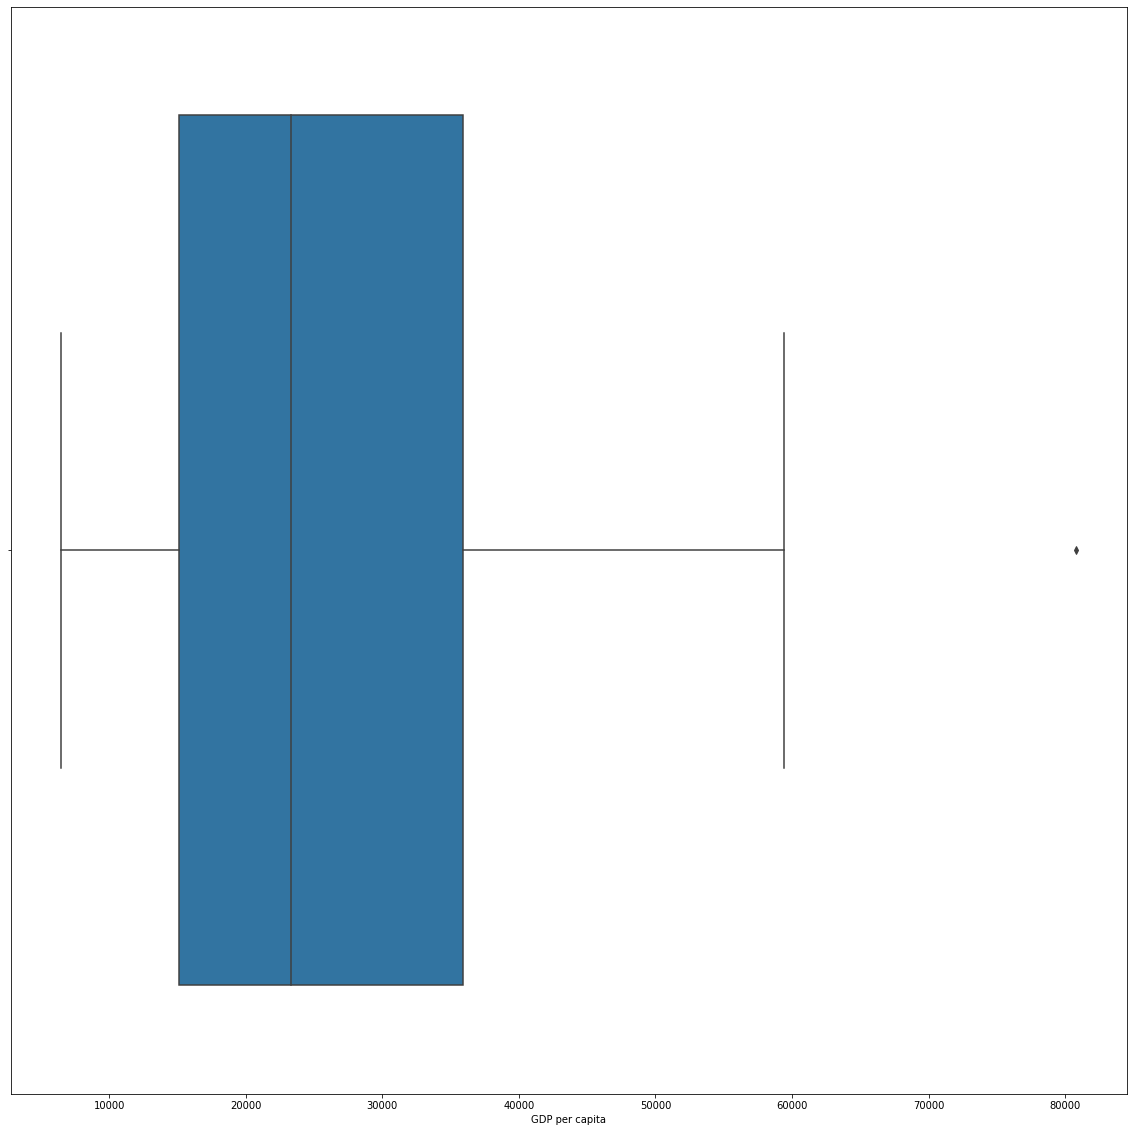

In [12]:
sns.boxplot(x=df['GDP per capita'])

These are main statistics for each attribute. We print count, mean, std, min and percentiles
- Count shows 29, because this is the number of countries we are displaying
- We can see that there is a huge difference between percentile 75 and max. So, there are not too many countries that have a higher GDP per capita than 35900
- STD in Vehicle ownership is 109.154216. This means that there is a significant difference between countries where inhabitants can afford so many vehicles and countries where they cannot.

In [13]:
df.describe()

,Year,Area (thousands of km),Population,GDP per capita,Population density (inhabitants per km2),Vehicle ownership,Total Road Deaths,Road deaths per Million Inhabitants
count,29.0,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2018.0,307.827586,3.533650e+07,27234.482759,180.655172,568.000000,1731.724138,53.206897
std,0.0,816.322722,9.466918e+07,16595.551811,268.852891,109.154216,4644.381297,17.742965
min,2018.0,0.300000,4.757010e+05,6500.000000,18.000000,329.000000,18.000000,28.000000
25%,2018.0,45.200000,4.105493e+06,15100.000000,74.000000,508.000000,170.000000,39.000000
50%,2018.0,83.900000,9.778371e+06,23300.000000,112.000000,585.000000,590.000000,51.000000
75%,2018.0,302.100000,1.953063e+07,35900.000000,137.000000,620.000000,1806.000000,62.000000
max,2018.0,4463.400000,5.123792e+08,80800.000000,1462.000000,740.000000,25249.000000,96.000000


Let's display some histograms to see where values are ranged

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Area (thousands of km)'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'GDP per capita'}>,
        <AxesSubplot:title={'center':'Population density (inhabitants per km2)'}>,
        <AxesSubplot:title={'center':'Vehicle ownership'}>],
       [<AxesSubplot:title={'center':'Total Road Deaths'}>,
        <AxesSubplot:title={'center':'Road deaths per Million Inhabitants'}>,
        <AxesSubplot:>]], dtype=object)

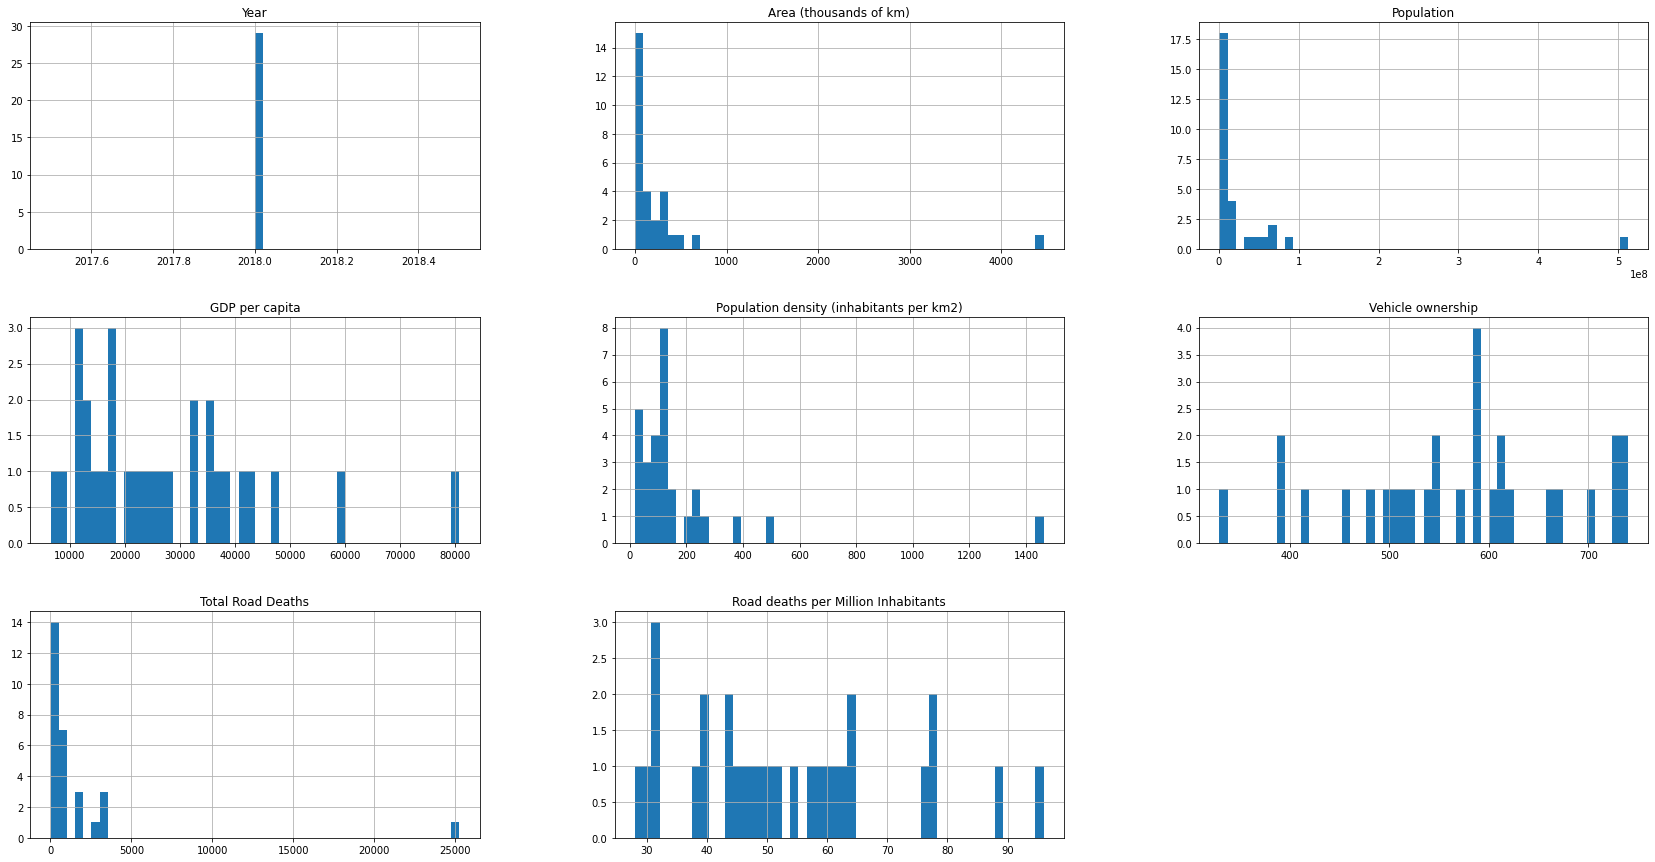

In [14]:
df.hist(bins=50,figsize=(29,15))

Here I plot a scatter plot between Country and GDP per capita. We can analyze it to know if countries (for instance, located in Europe, Asia, or America) are closer according to its continent.

<AxesSubplot:xlabel='Country', ylabel='GDP per capita'>

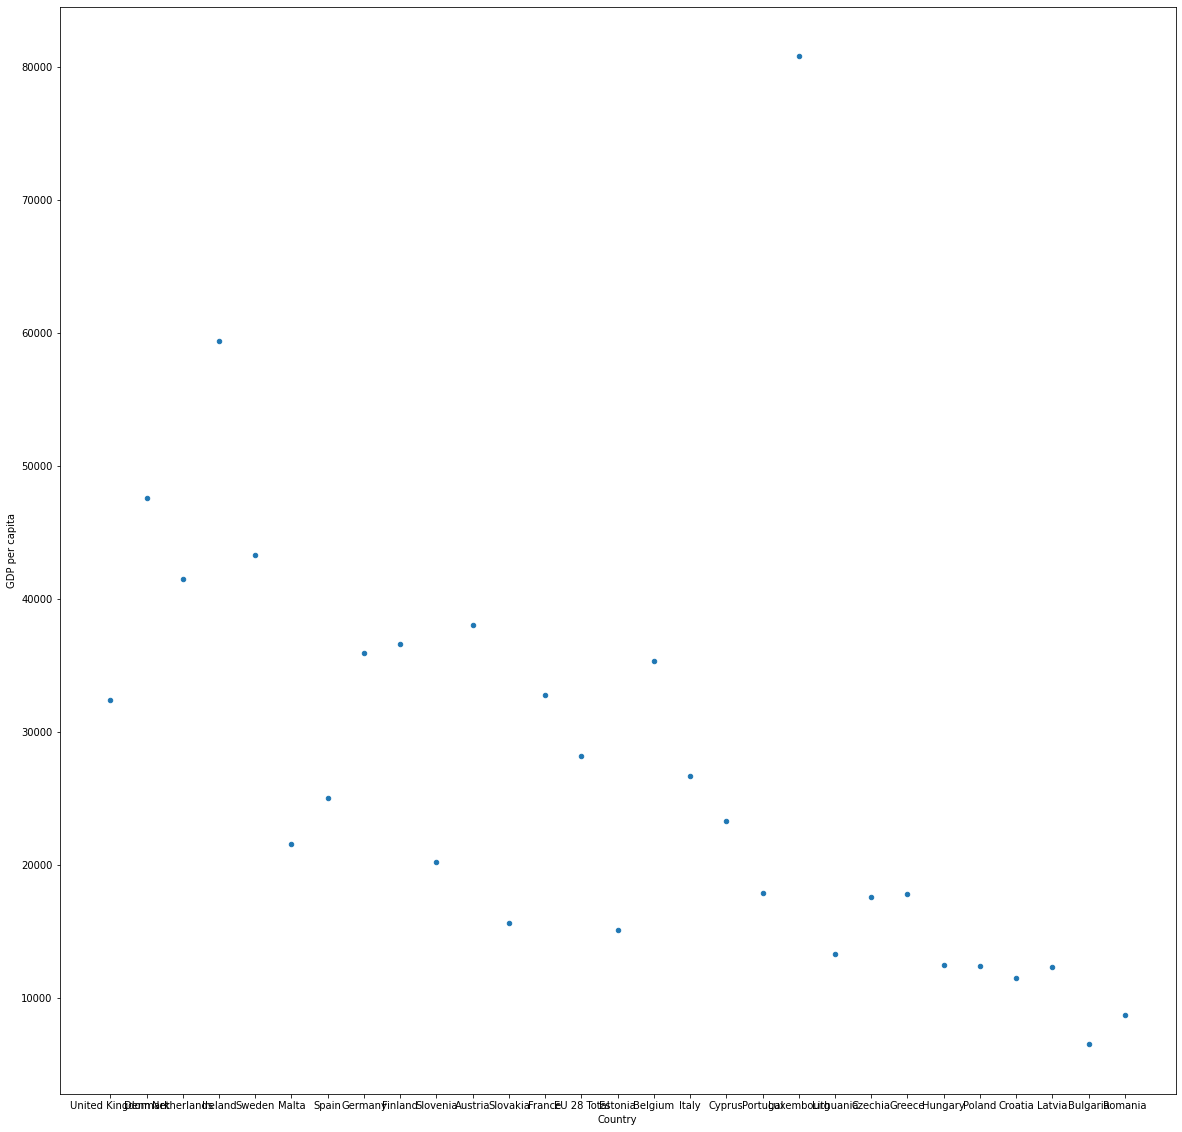

In [15]:
df.plot(kind="scatter",x='Country',y='GDP per capita')

In this plot, we could think if there is a relation between higher population and higher total road deaths, which is probably logic. A regression model could predict how many total road eaths would be in a different country according to its popoulation.

<AxesSubplot:xlabel='Population', ylabel='Total Road Deaths'>

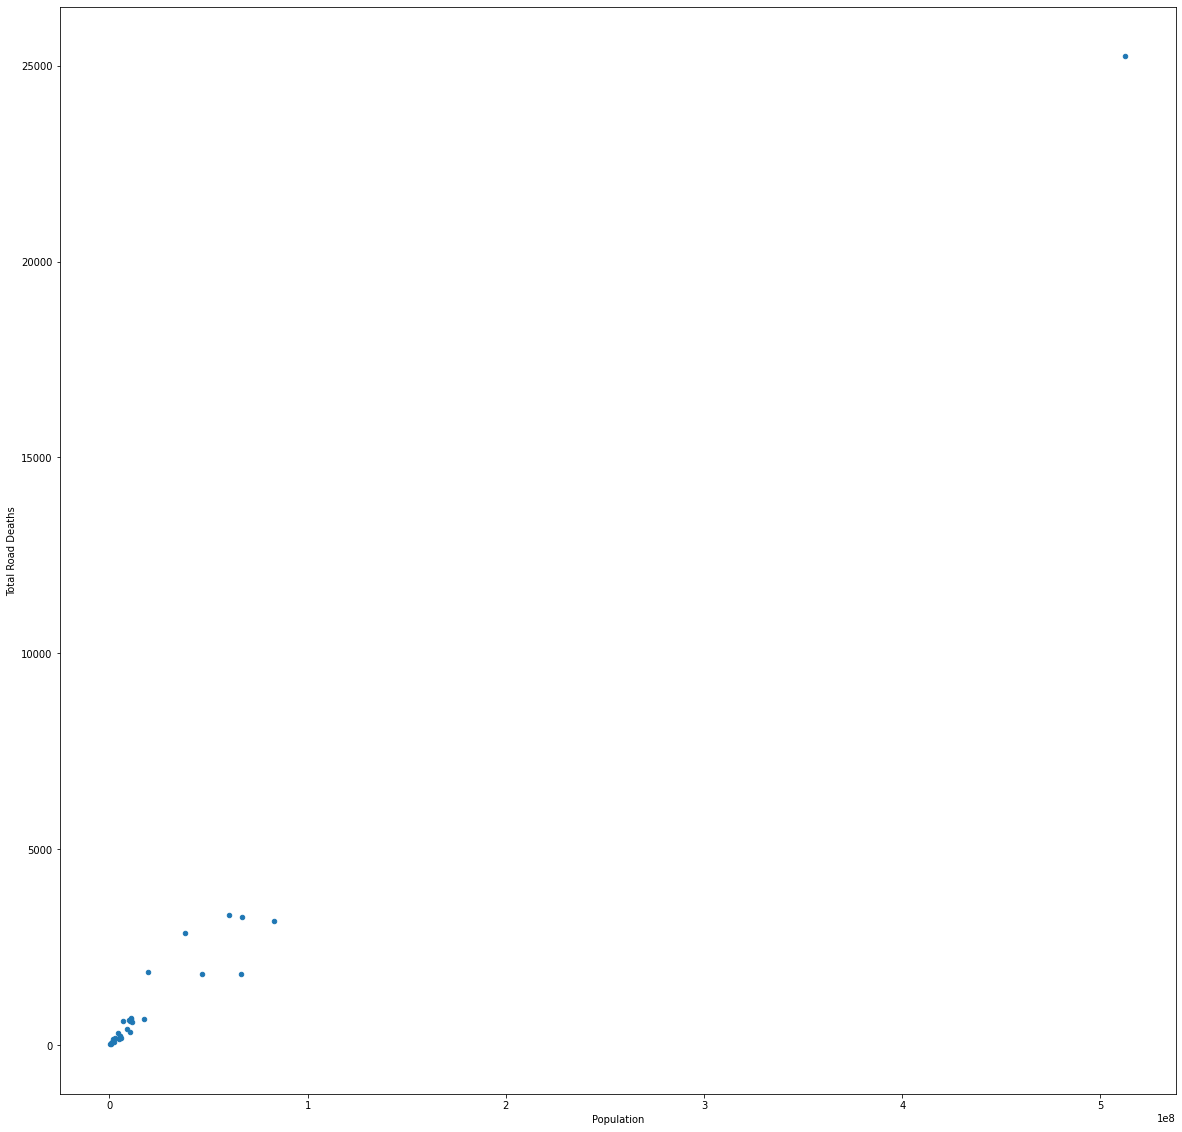

In [16]:
df.plot(kind="scatter",x='Population',y='Total Road Deaths')

# Save data into csv

In [17]:
df.to_csv('data.csv')